In [7]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error,accuracy_score,ConfusionMatrixDisplay
import joblib




📌 1. Objetivo o Hipótesis a Demostrar
Describe aquí cuál es el propósito de este proyecto.

Ejemplo: Demostrar que es posible predecir la probabilidad de abandono de un cliente en base a sus características de uso del servicio.

In [26]:



df = pd.read_csv("Salary_dataset.csv")
df.columns
df.info()
df.describe()
print(df.describe())
df = df.drop( 'Unnamed: 0', axis=1)
print("valores_nulos",df.isna().sum(),"\n")

















<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 848.0 bytes
       Unnamed: 0  YearsExperience         Salary
count   30.000000        30.000000      30.000000
mean    14.500000         5.413333   76004.000000
std      8.803408         2.837888   27414.429785
min      0.000000         1.200000   37732.000000
25%      7.250000         3.300000   56721.750000
50%     14.500000         4.800000   65238.000000
75%     21.750000         7.800000  100545.750000
max     29.000000        10.600000  122392.000000
valores_nulos YearsExperience    0
Salary             0
dtype: int64 



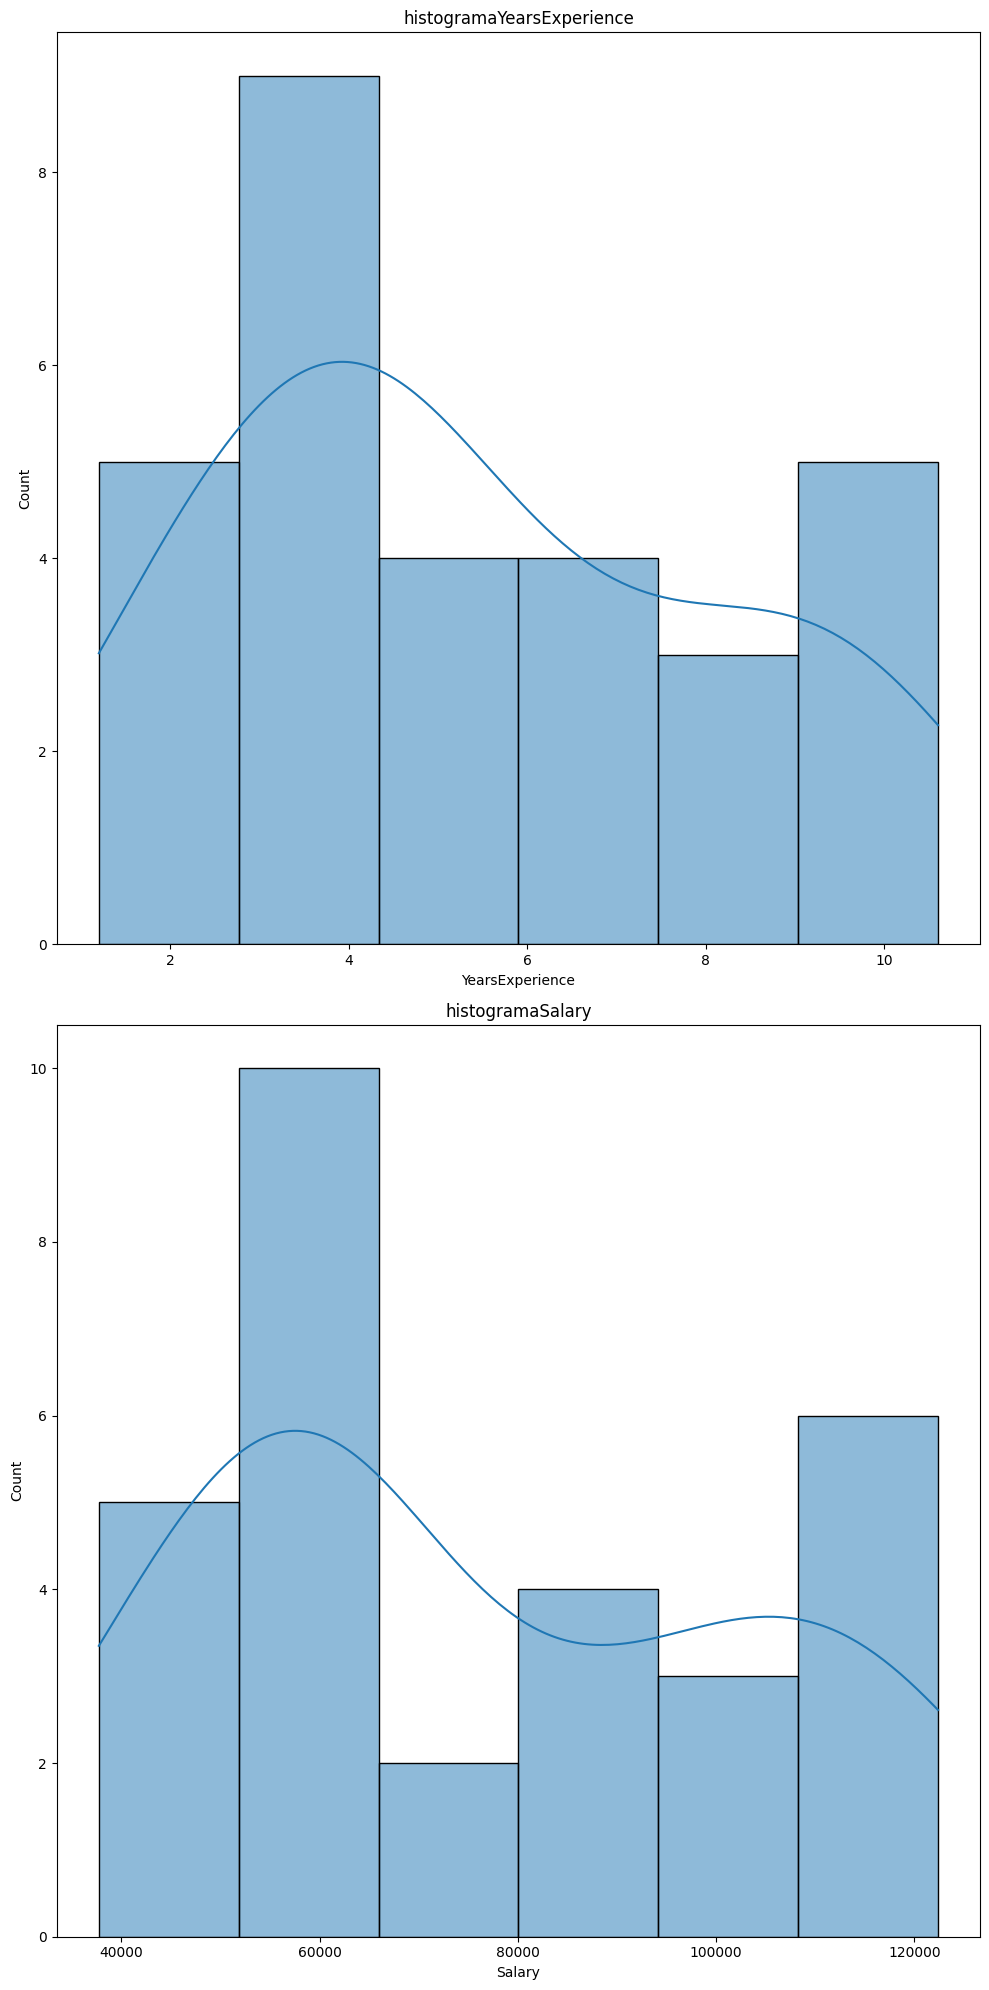

In [27]:
fig,axex = plt.subplots(nrows=2,ncols=1,figsize=(10,20))
for col,ax in zip(df,axex):
    ax.set_title(f"histograma{col}")
    sns.histplot(data=df[col],ax=ax,kde=True)
    
    
    plt.tight_layout()
plt.show()


C:\Users\Manu\AppData\Local\Temp\ipykernel_4256\3854887114.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


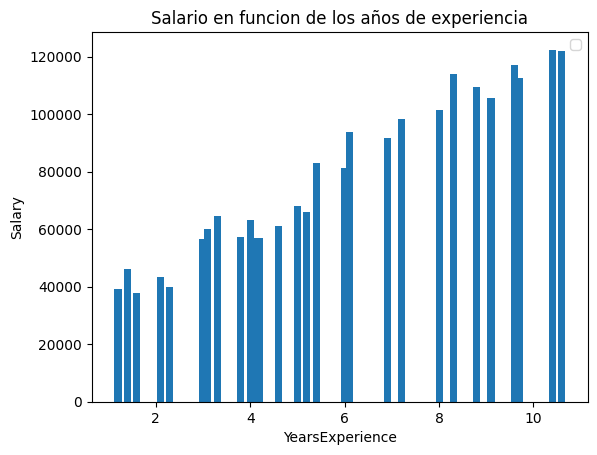

In [28]:
plt.bar(df['YearsExperience'],df['Salary'],width=0.15)
plt.xlabel("YearsExperience")
plt.ylabel('Salary')
plt.legend()
plt.title('Salario en funcion de los años de experiencia')
plt.show()

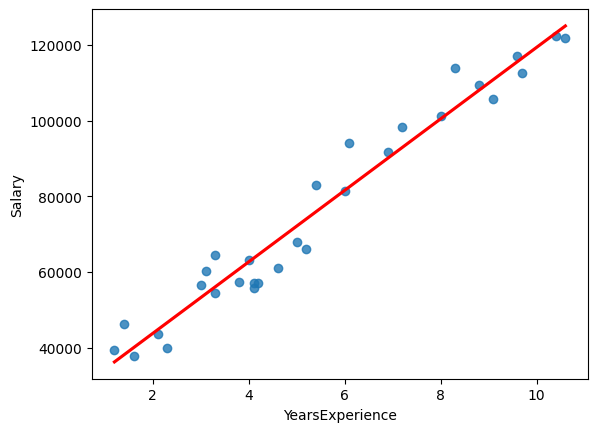

In [29]:
sns.regplot(x=df['YearsExperience'],y=df['Salary'],ci=None,line_kws={'color':'red'})
plt.show()

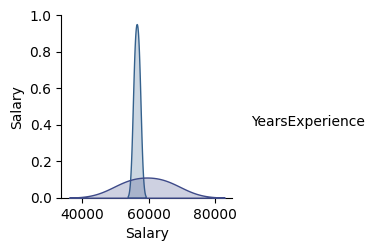

In [30]:
sns.pairplot(data=df,hue='YearsExperience',palette='viridis')
plt.show()

                 YearsExperience    Salary
YearsExperience         1.000000  0.978242
Salary                  0.978242  1.000000


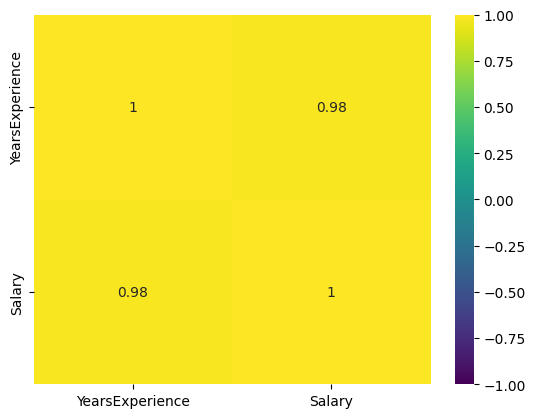

In [31]:
matriz = df.corr()
print(matriz)
sns.heatmap(matriz,cmap = 'viridis',vmin=-1,vmax=1,annot=True)
plt.show()


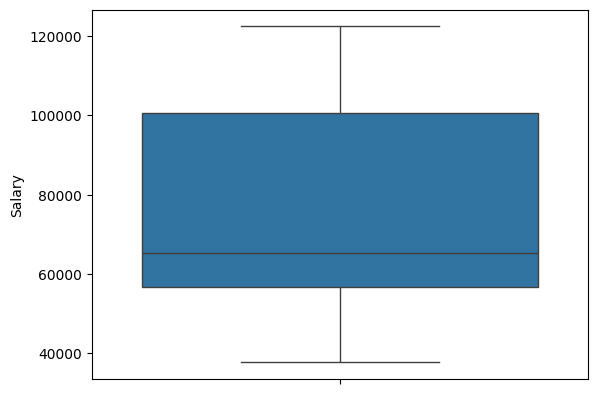

In [32]:
sns.boxplot(df['Salary'])
plt.show()

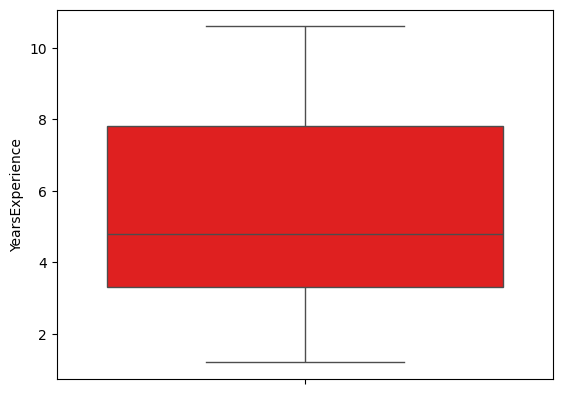

In [33]:
sns.boxplot(df['YearsExperience'],color="Red")
plt.show()

In [ ]:

X = df.drop(columns= "Salary")
y = df['Salary']
print(y.shape)
print(X.shape)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2  ,  random_state=42)
regresion_lineal = LinearRegression()
regresion_lineal.fit(X_train,y_train)
print(X_test)
y_pred = regresion_lineal.predict(X_test)
print(y_pred)
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
rmse = np.sqrt(mean_absolute_error(y_test,y_pred))
print(f"Mae:{mae:.2f}\nR2:{r2:.2f}\nRMSE:{rmse:.2f}")
regresion_lineal.score(X_test,y_test)
joblib.dump(regresion_lineal,"salario.pkl")


(30,)
(30, 1)
    YearsExperience
27              9.7
15              5.0
23              8.3
17              5.4
8               3.3
9               3.8
[115791.21011287  71499.27809463 102597.86866063  75268.80422384
  55478.79204548  60190.69970699]
Mae:6286.45
R2:0.90
RMSE:79.29


['salario.pkl']

In [35]:
import numpy as np 
import pandas as pd 


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import joblib


def split_regresion_lineal_simple(dataset):
    df = dataset.copy()
    X = df.drop(columns= "Salary")
    y = df["Salary"]
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
    return X_train,y_train,
def entrenar_regresion_lineal_simple(X_train,y_train):
    regresion_lineal = LinearRegression()
    regresion_lineal.fit(X_train,y_train)
    joblib.dump(regresion_lineal,"regresion_lineal_salario_años.pkl")
def pipeline_regresion_lineal_simple(dataset):
     X_train,y_train=split_regresion_lineal_simple(dataset)
     entrenar_regresion_lineal_simple(X_train,y_train)
if __name__ == "__main__":
    dataset=pd.read_csv("Salary_dataset.csv")
    pipeline_regresion_lineal_simple(dataset)
   


    




# El mae alto  indica que el  rendimiento  del modelo no es lo suficiente preciso y las predicciones no estan cerca de los datos reales 
# El r2 determina  que el modelo no es capaz de explicar toda la variabilidad de  los datos 
# el rmse  indica que los valores atipicos no los termina de predecir bien 
# Esto determina  que a lo mejor una regresion lineal no es apta para este tipo de hipotesis y quizas deberiamos cambiar a una regresion lineal multiple   debido a que otras variables pueden ser  factorews determinantes para predecir el salario en funcion de los años de experiencia tras explorar el dataset se ha observado que hay varias columnas que podrian ser aptas para este tipo de algoritmo 

In [36]:
df = pd.read_csv("salary.csv")
df.columns

print("valores_nulos",df.isna().sum(),"\n")
df = df.dropna()
df.info()
df.describe()



valores_nulos Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64 

<class 'pandas.core.frame.DataFrame'>
Index: 6698 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6698 non-null   float64
 1   Gender               6698 non-null   object 
 2   Education Level      6698 non-null   object 
 3   Job Title            6698 non-null   object 
 4   Years of Experience  6698 non-null   float64
 5   Salary               6698 non-null   float64
dtypes: float64(3), object(3)
memory usage: 366.3+ KB


Age  Years of Experience         Salary
count  6698.000000          6698.000000    6698.000000
mean     33.623022             8.095178  115329.253061
std       7.615784             6.060291   52789.792507
min      21.000000             0.000000     350.000000
25%      28.000000             3.000000   70000.000000
50%      32.000000             7.000000  115000.000000
75%      38.000000            12.000000  160000.000000
max      62.000000            34.000000  250000.000000

In [37]:
data= pd.read_csv("Student_Performance.csv")
df = data.copy()

In [38]:
df.info()
print(df.describe())
print(df["Extracurricular Activities"].unique())
df['Extracurricular Activities'] = df['Extracurricular Activities'].map({'Yes' : 1 , 'No' : 0})


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB
       Hours Studied  Previous Scores   Sleep Hours  \
count   10000.000000     10000.000000  10000.000000   
mean        4.992900        69.445700      6.530600   
std         2.589309        17.343152      1.695863   
min         1.000000        40.000000      4.000000   
25%         3.000000        54.000000      5.00000

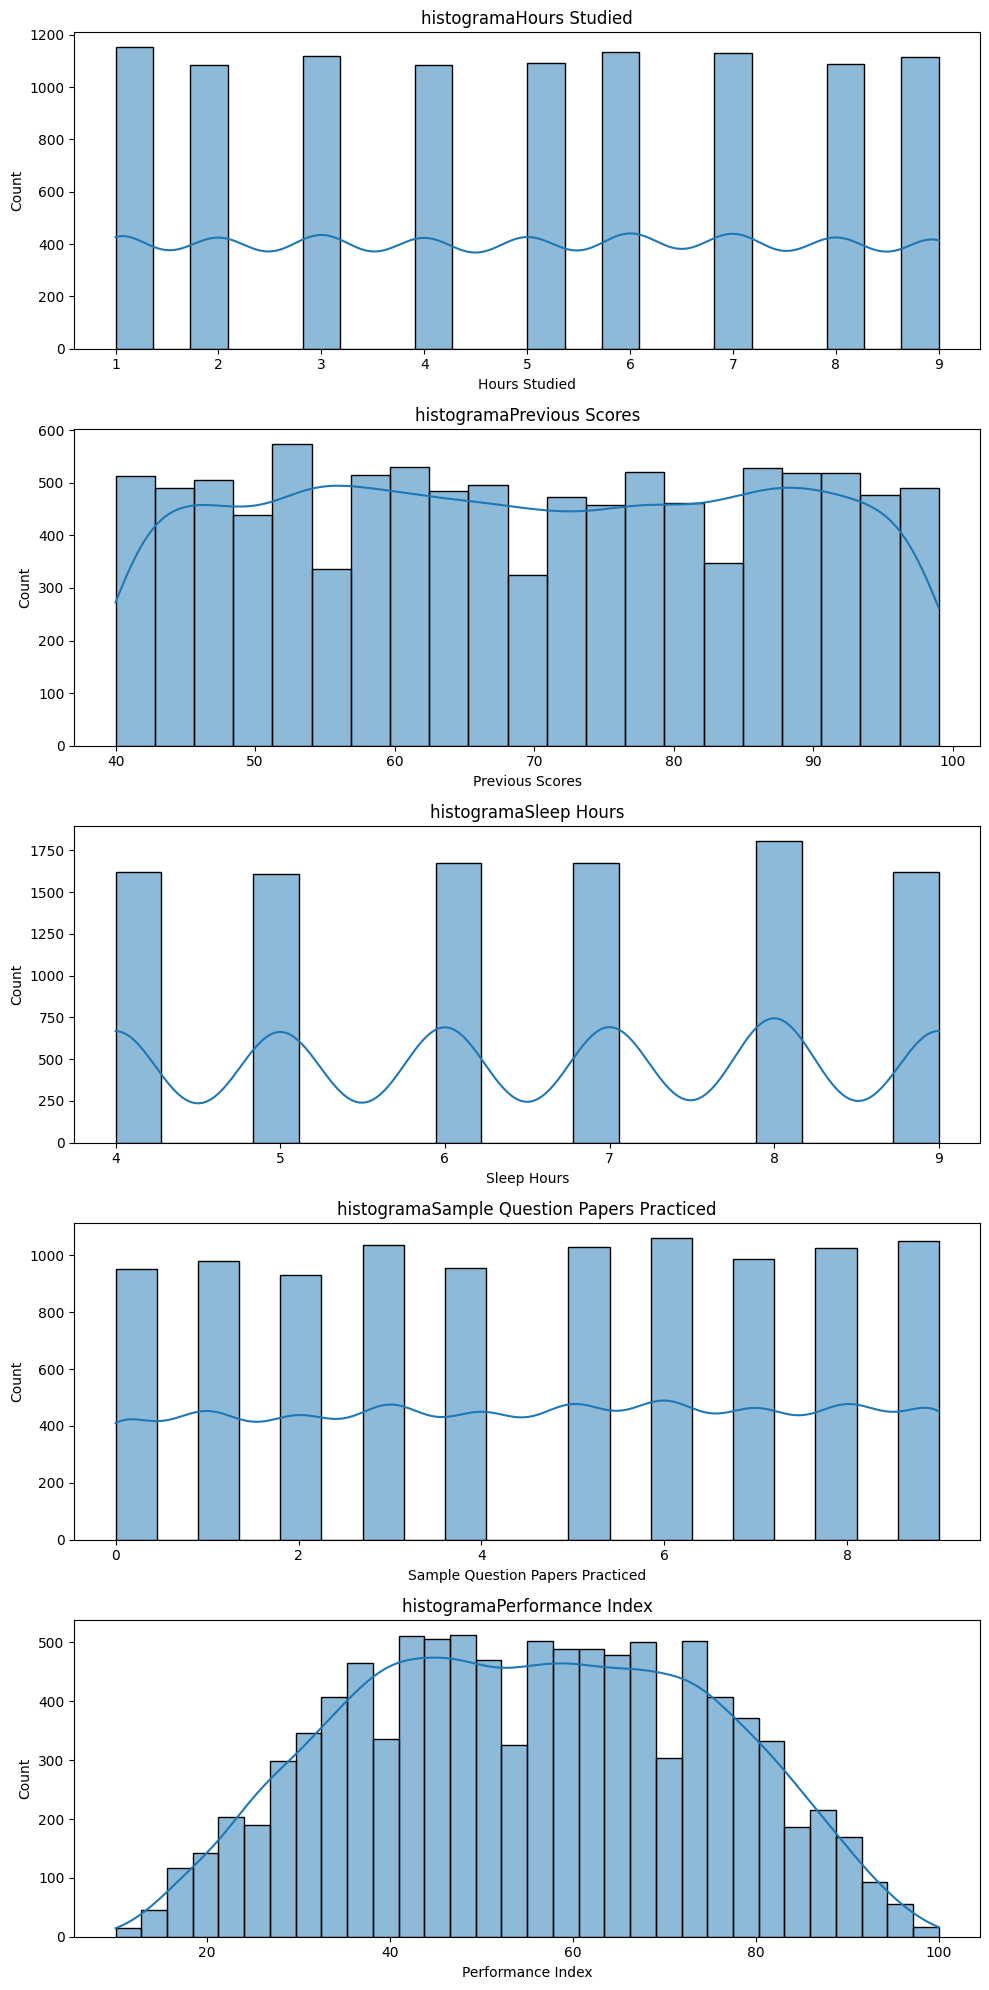

In [39]:
df_explorar = df.drop(columns='Extracurricular Activities')

fig,axex = plt.subplots(nrows=5,ncols=1,figsize=(10,20))
for col,ax in zip(df_explorar,axex):
    ax.set_title(f"histograma{col}")
    sns.histplot(data=df[col],ax=ax,kde=True)
    
    
    plt.tight_layout()
plt.show()


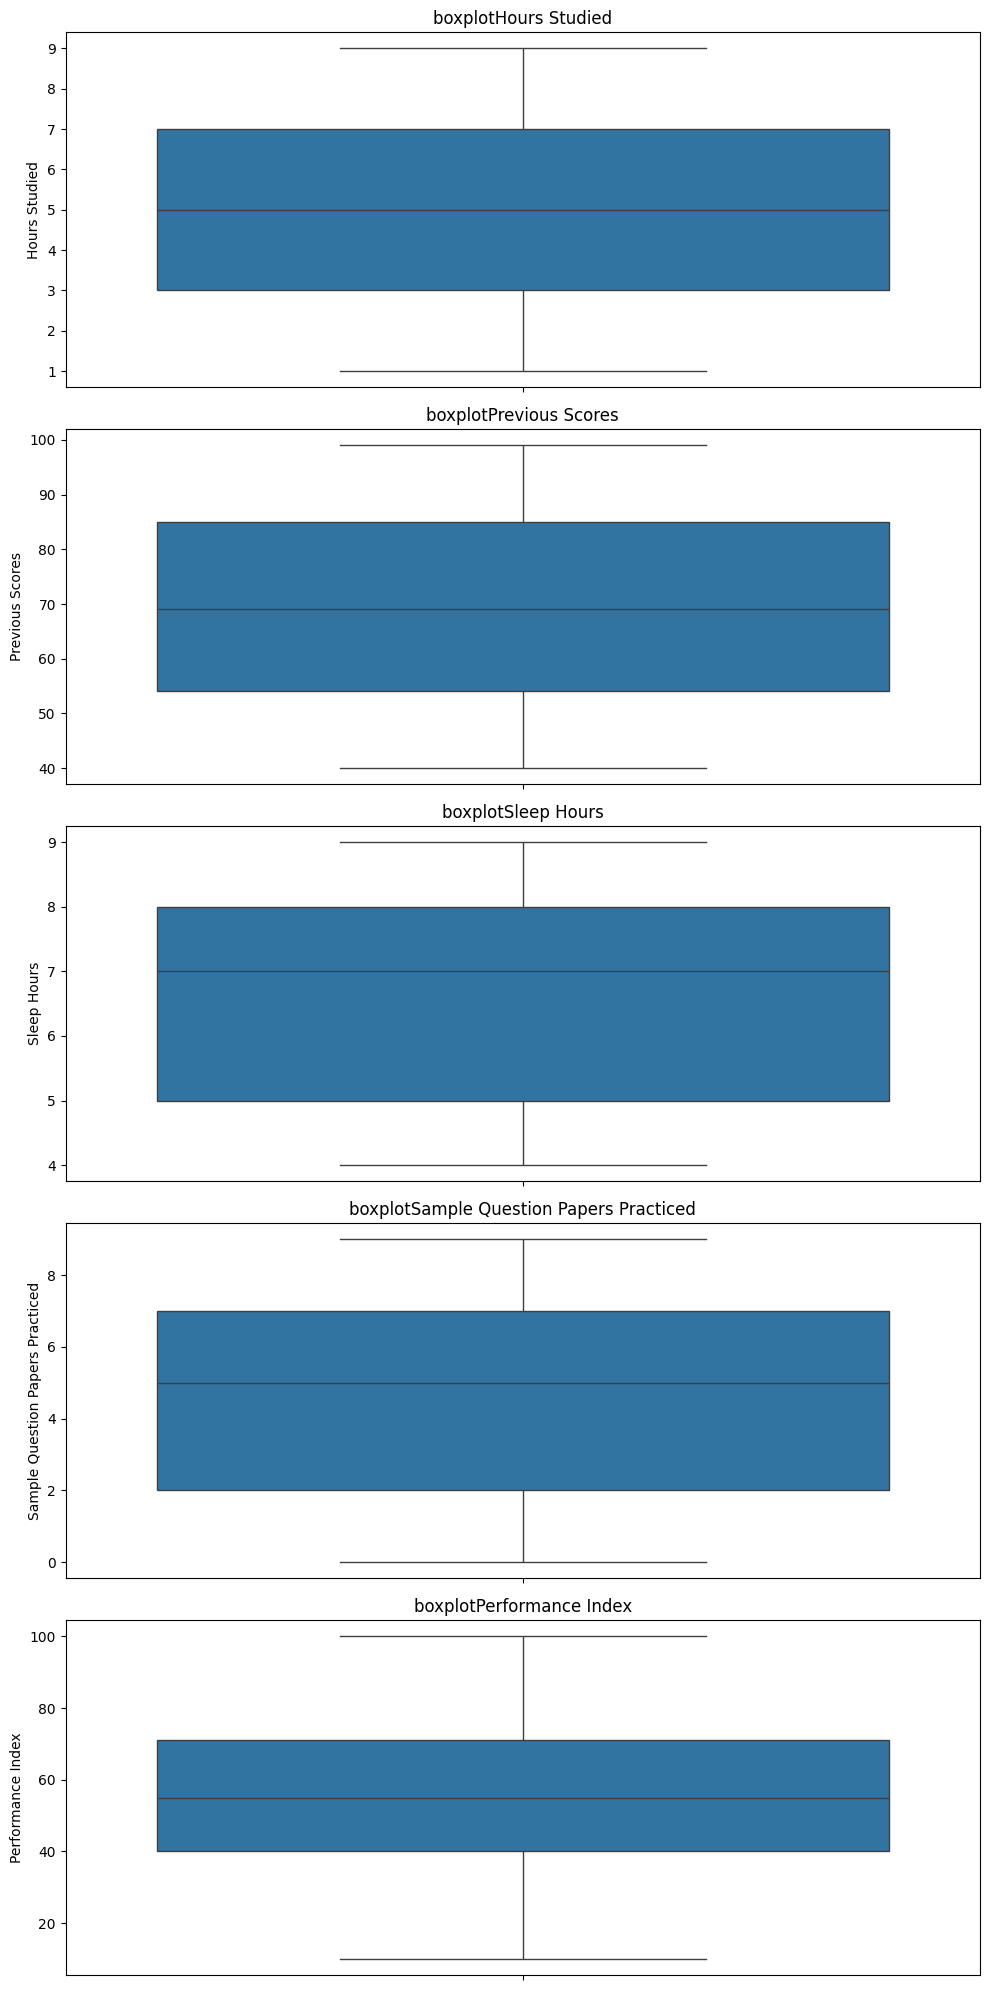

In [40]:

df_explorar.shape
fig,axex = plt.subplots(nrows=5,ncols=1,figsize=(10,20))
for col,ax in zip(df_explorar,axex):
    ax.set_title(f"boxplot{col}")
    sns.boxplot(data=df[col],ax=ax)
    
    
    plt.tight_layout()
plt.show()

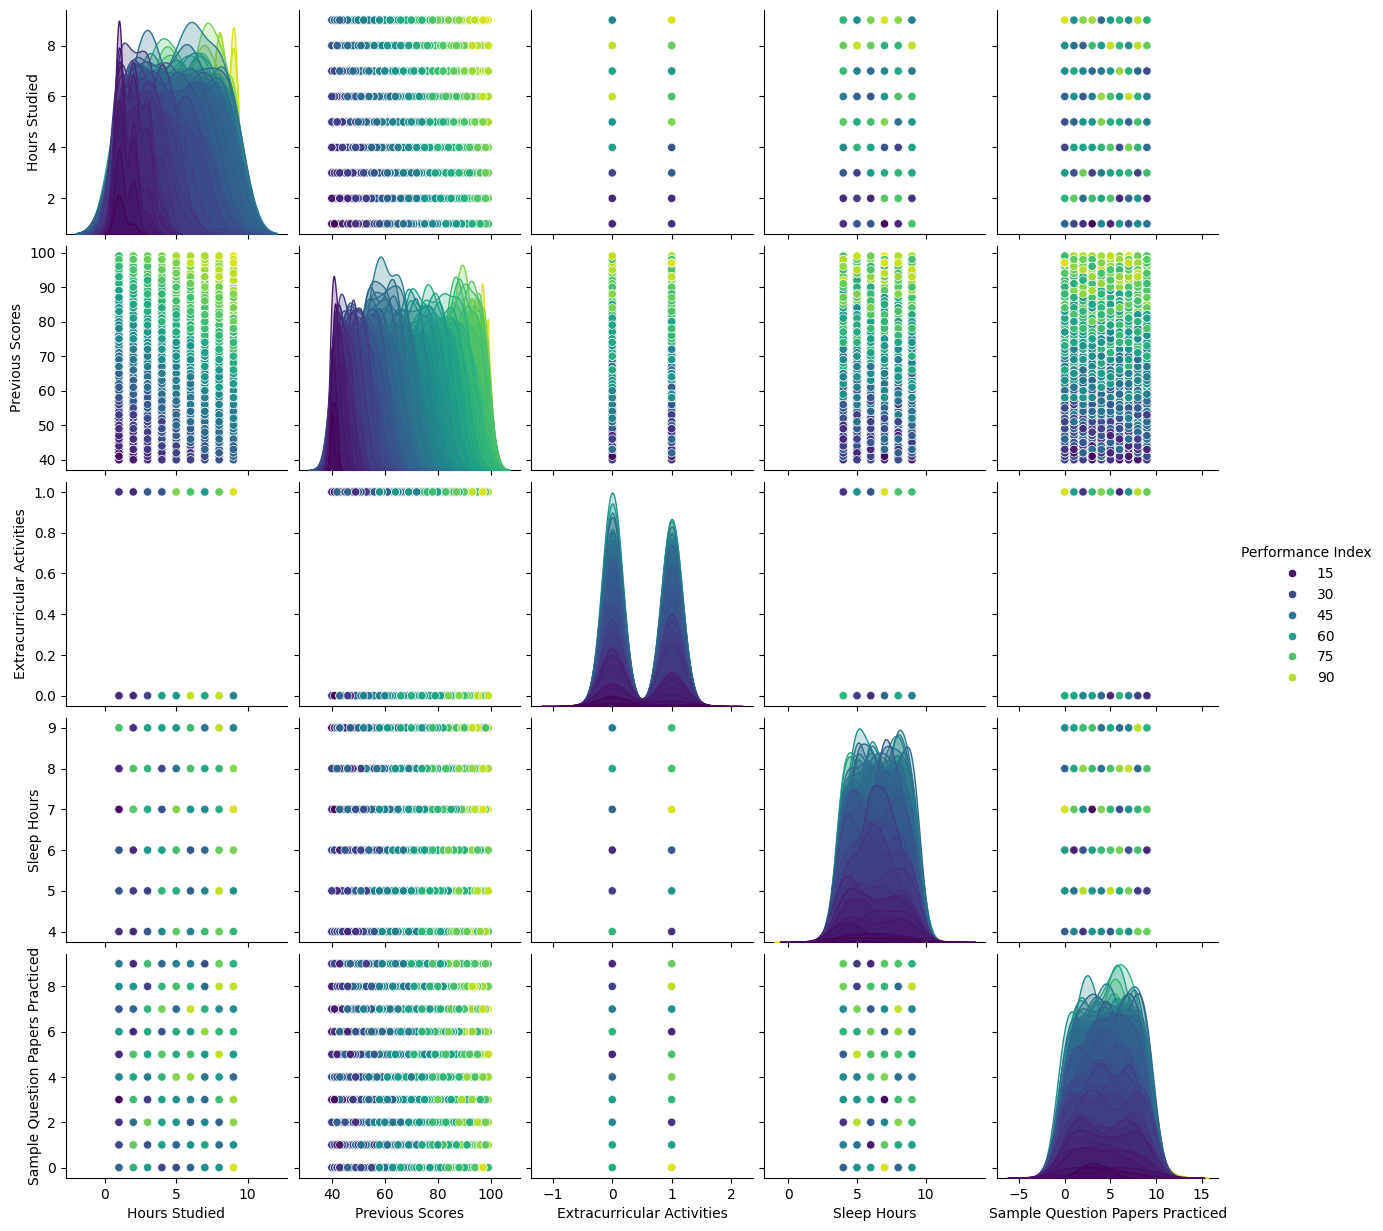

In [41]:
sns.pairplot(data=df,hue='Performance Index',palette='viridis')
plt.show()

                                  Hours Studied  Previous Scores  \
Hours Studied                          1.000000        -0.012390   
Previous Scores                       -0.012390         1.000000   
Extracurricular Activities             0.003873         0.008369   
Sleep Hours                            0.001245         0.005944   
Sample Question Papers Practiced       0.017463         0.007888   
Performance Index                      0.373730         0.915189   

                                  Extracurricular Activities  Sleep Hours  \
Hours Studied                                       0.003873     0.001245   
Previous Scores                                     0.008369     0.005944   
Extracurricular Activities                          1.000000    -0.023284   
Sleep Hours                                        -0.023284     1.000000   
Sample Question Papers Practiced                    0.013103     0.003990   
Performance Index                                   0.024525 

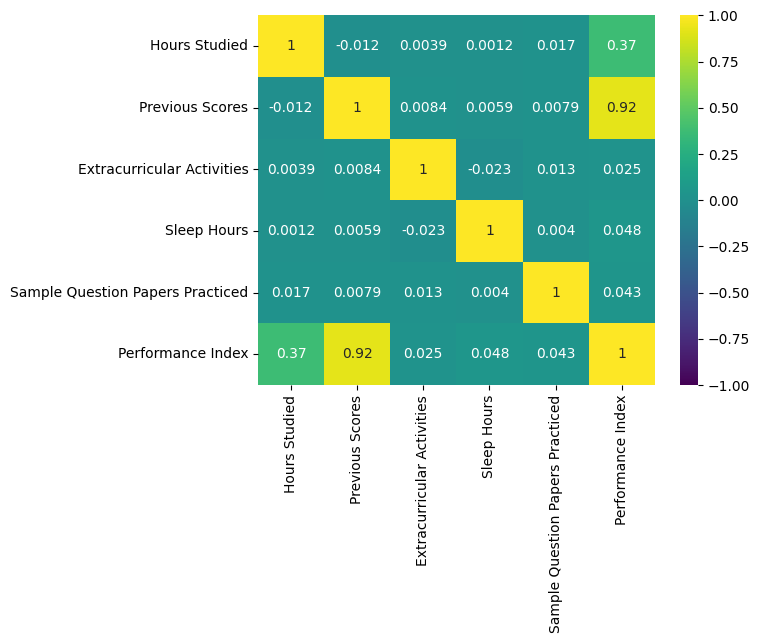

In [42]:

matriz = df.corr()
print(matriz)
sns.heatmap(matriz,cmap = 'viridis',vmin=-1,vmax=1,annot=True)
plt.show()


In [43]:
print(df.columns)
X = df.drop(columns = ['Performance Index'])
y = df['Performance Index']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
regresion_lineal_multiple = LinearRegression()
regresion_lineal_multiple.fit(X_train,y_train)
y_pred = regresion_lineal_multiple.predict(X_test)
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
rmse = np.sqrt(mean_absolute_error(y_test,y_pred))
print(f"Mae:{mae:.2f}\nR2:{r2:.2f}\nRMSE:{rmse:.2f}")
regresion_lineal_multiple.score(X_test,y_test)
joblib.dump(regresion_lineal_multiple,"regresion_lineal_multiple.pkl")


Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')
Mae:1.61
R2:0.99
RMSE:1.27


['regresion_lineal_multiple.pkl']

In [ ]:
import numpy as np 
import pandas as pd 


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import joblib


def split_regresion_lineal_multiple(dataset):
    df = dataset.copy()
    X = df.drop(columns = ['Performance Index'])
    y = df['Performance Index']
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
    return X_train,y_train,
def entrenar_regresion_lineal_multiple(X_train,y_train):
    regresion_lineal = LinearRegression()
    regresion_lineal.fit(X_train,y_train)
    joblib.dump(regresion_lineal_multiple,"regresion_lineal_multiple.pkl")
def pipeline_regresion_lineal_multiple(dataset):
     X_train,y_train = split_regresion_lineal_multiple(dataset)
     entrenar_regresion_lineal_multiple(X_train,y_train)
if __name__ == "__main__":
    dataset=pd.read_csv("Salary_dataset.csv")
    pipeline_regresion_lineal_multiple(dataset)
   

KeyError: "['Performance Index'] not found in axis"

In [ ]:
data = pd.read_csv("Bank Customer Churn Prediction.csv")
df = data.copy()

In [ ]:
df.info()
print("valores_nulos",df.isna().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB
valores_nulos customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
pr

In [ ]:
df.describe()

customer_id  credit_score           age        tenure        balance  \
count  1.000000e+04  10000.000000  10000.000000  10000.000000   10000.000000   
mean   1.569094e+07    650.528800     38.921800      5.012800   76485.889288   
std    7.193619e+04     96.653299     10.487806      2.892174   62397.405202   
min    1.556570e+07    350.000000     18.000000      0.000000       0.000000   
25%    1.562853e+07    584.000000     32.000000      3.000000       0.000000   
50%    1.569074e+07    652.000000     37.000000      5.000000   97198.540000   
75%    1.575323e+07    718.000000     44.000000      7.000000  127644.240000   
max    1.581569e+07    850.000000     92.000000     10.000000  250898.090000   

       products_number  credit_card  active_member  estimated_salary  \
count     10000.000000  10000.00000   10000.000000      10000.000000   
mean          1.530200      0.70550       0.515100     100090.239881   
std           0.581654      0.45584       0.499797      57510.492818   
min           1.000000      0.00000       0.000000         11.580000   
25%           1.000000      0.00000       0.000000      51002.110000   
50%           1.000000      1.00000       1.000000     100193.915000   
75%           2.000000      1.00000       1.000000     149388.247500   
max           4.000000      1.00000       1.000000     199992.480000   

              churn  
count  10000.000000  
mean       0.203700  
std        0.402769  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000

In [ ]:
df


customer_id  credit_score  country  gender  age  tenure    balance  \
0        15634602           619   France  Female   42       2       0.00   
1        15647311           608    Spain  Female   41       1   83807.86   
2        15619304           502   France  Female   42       8  159660.80   
3        15701354           699   France  Female   39       1       0.00   
4        15737888           850    Spain  Female   43       2  125510.82   
...           ...           ...      ...     ...  ...     ...        ...   
9995     15606229           771   France    Male   39       5       0.00   
9996     15569892           516   France    Male   35      10   57369.61   
9997     15584532           709   France  Female   36       7       0.00   
9998     15682355           772  Germany    Male   42       3   75075.31   
9999     15628319           792   France  Female   28       4  130142.79   

      products_number  credit_card  active_member  estimated_salary  churn  
0                   1            1              1         101348.88      1  
1                   1            0              1         112542.58      0  
2                   3            1              0         113931.57      1  
3                   2            0              0          93826.63      0  
4                   1            1              1          79084.10      0  
...               ...          ...            ...               ...    ...  
9995                2            1              0          96270.64      0  
9996                1            1              1         101699.77      0  
9997                1            0              1          42085.58      1  
9998                2            1              0          92888.52      1  
9999                1            1              0          38190.78      0  

[10000 rows x 12 columns]

In [ ]:
df_explorar = df.select_dtypes(include=('int64','float64'))
df_explorar.shape

(10000, 10)

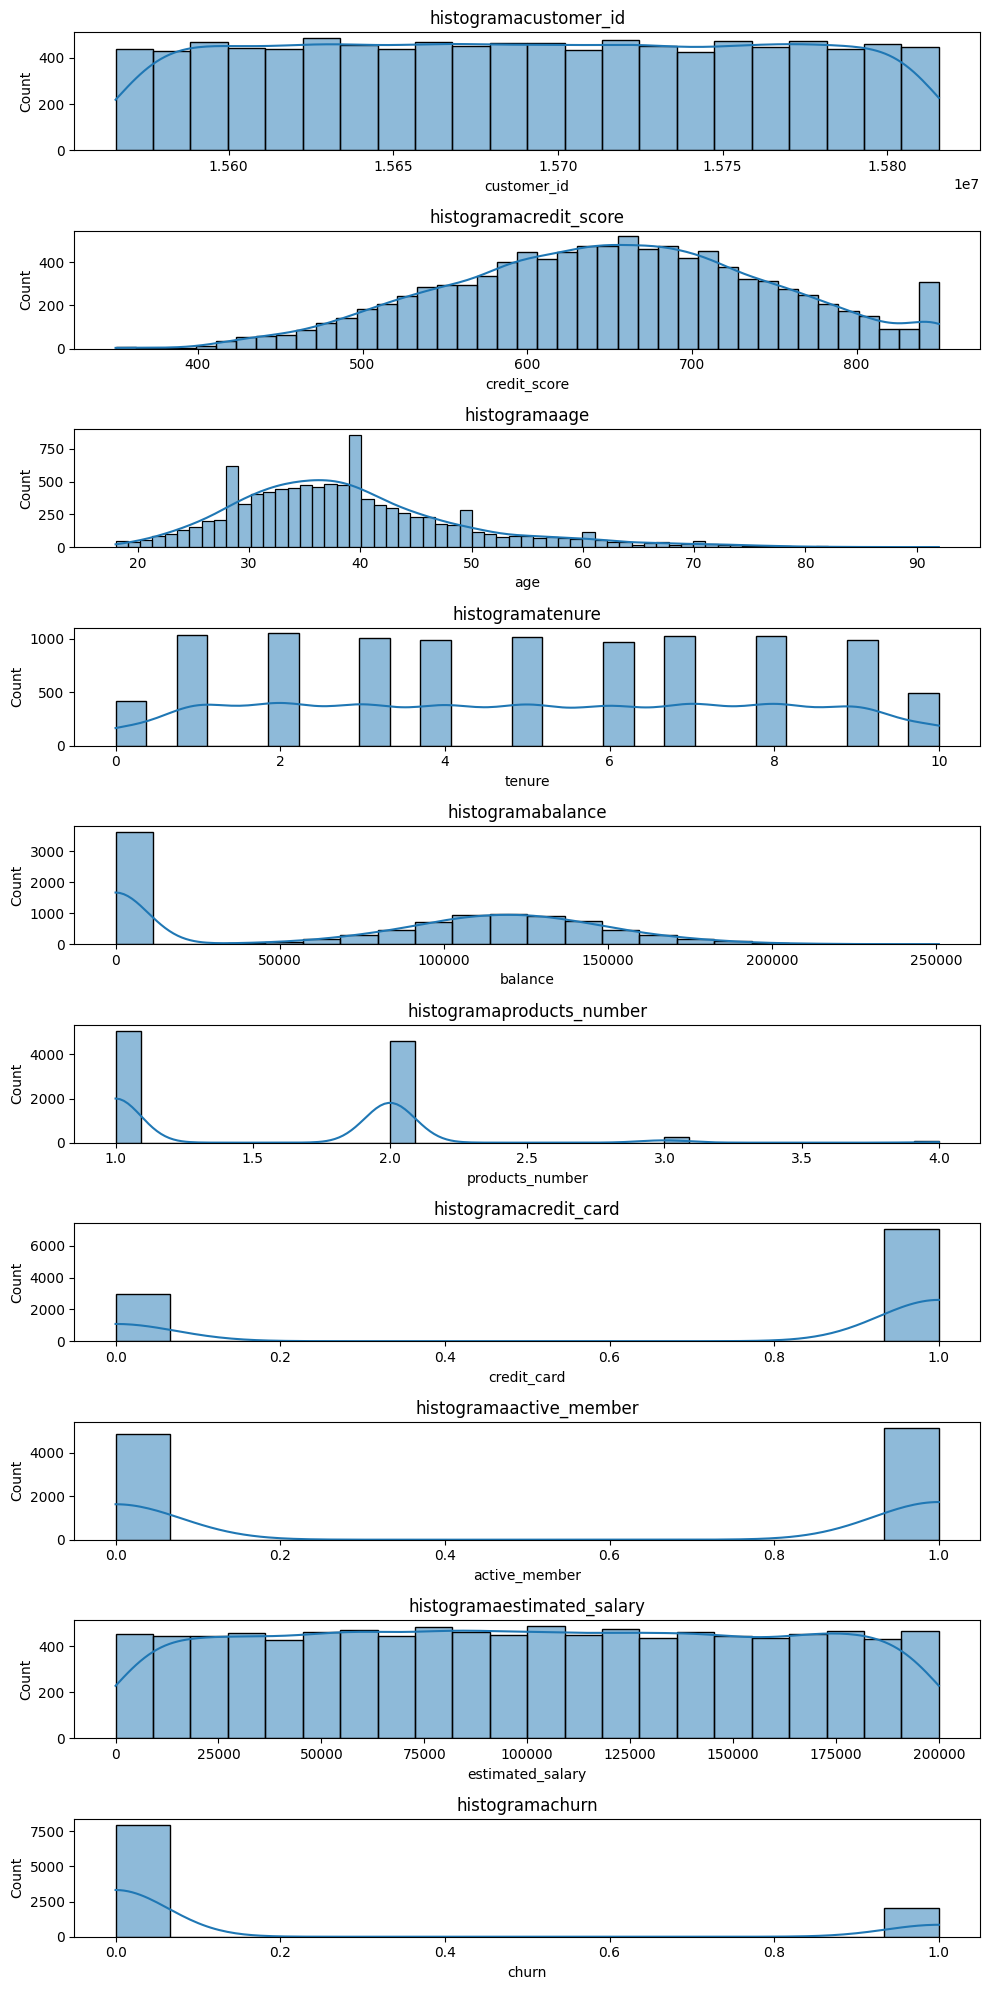

In [ ]:

fig,axex = plt.subplots(nrows=10,ncols=1,figsize=(10,20))
for col,ax in zip(df_explorar,axex):
    ax.set_title(f"histograma{col}")
    sns.histplot(data=df[col],ax=ax,kde=True)
    
    
    plt.tight_layout()
plt.show()

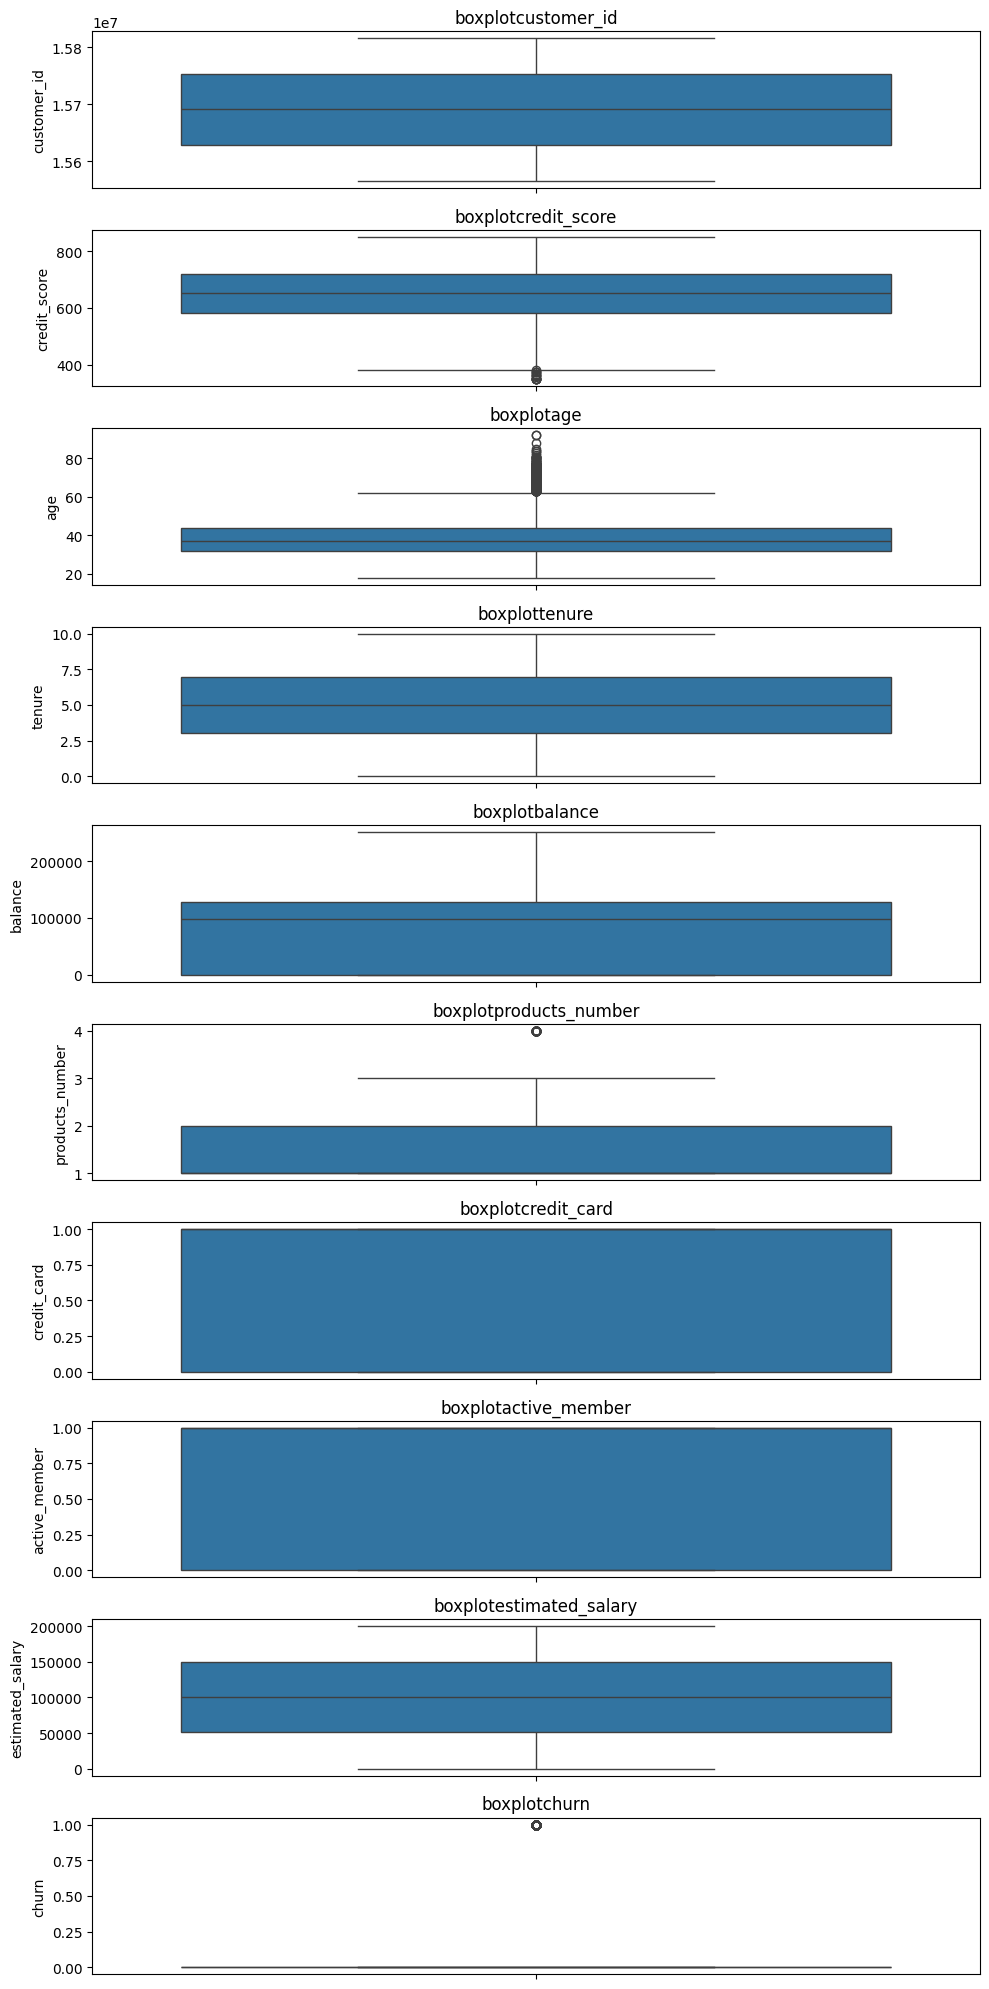

In [ ]:
fig,axex = plt.subplots(nrows=10,ncols=1,figsize=(10,20))
for col,ax in zip(df_explorar,axex):
    ax.set_title(f"boxplot{col}")
    sns.boxplot(data=df[col],ax=ax)
    
    
    plt.tight_layout()
plt.show()


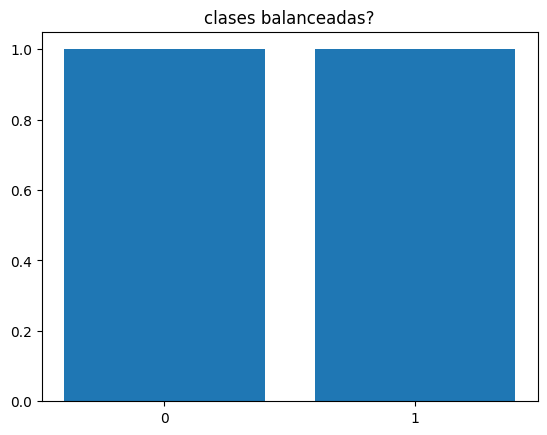

In [ ]:
df['churn']
plt.bar(df['churn'],height=1)

plt.title("clases balanceadas?")
plt.xticks((0,1))
plt.show()

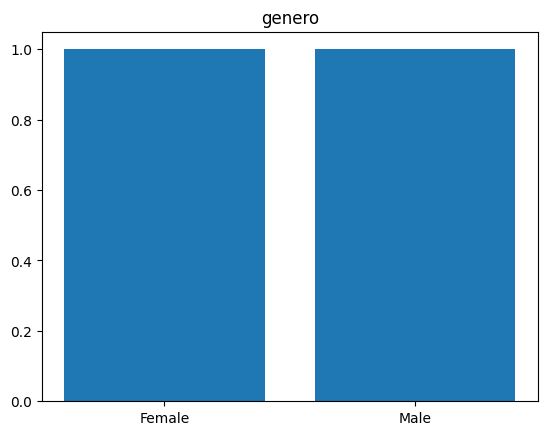

In [ ]:

plt.bar(df['gender'],height=1)

plt.title("genero")
plt.show()

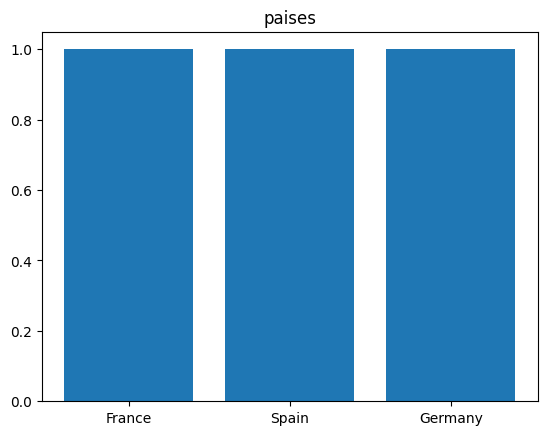

In [ ]:
plt.bar(df['country'],height=1)

plt.title("paises")
plt.show()


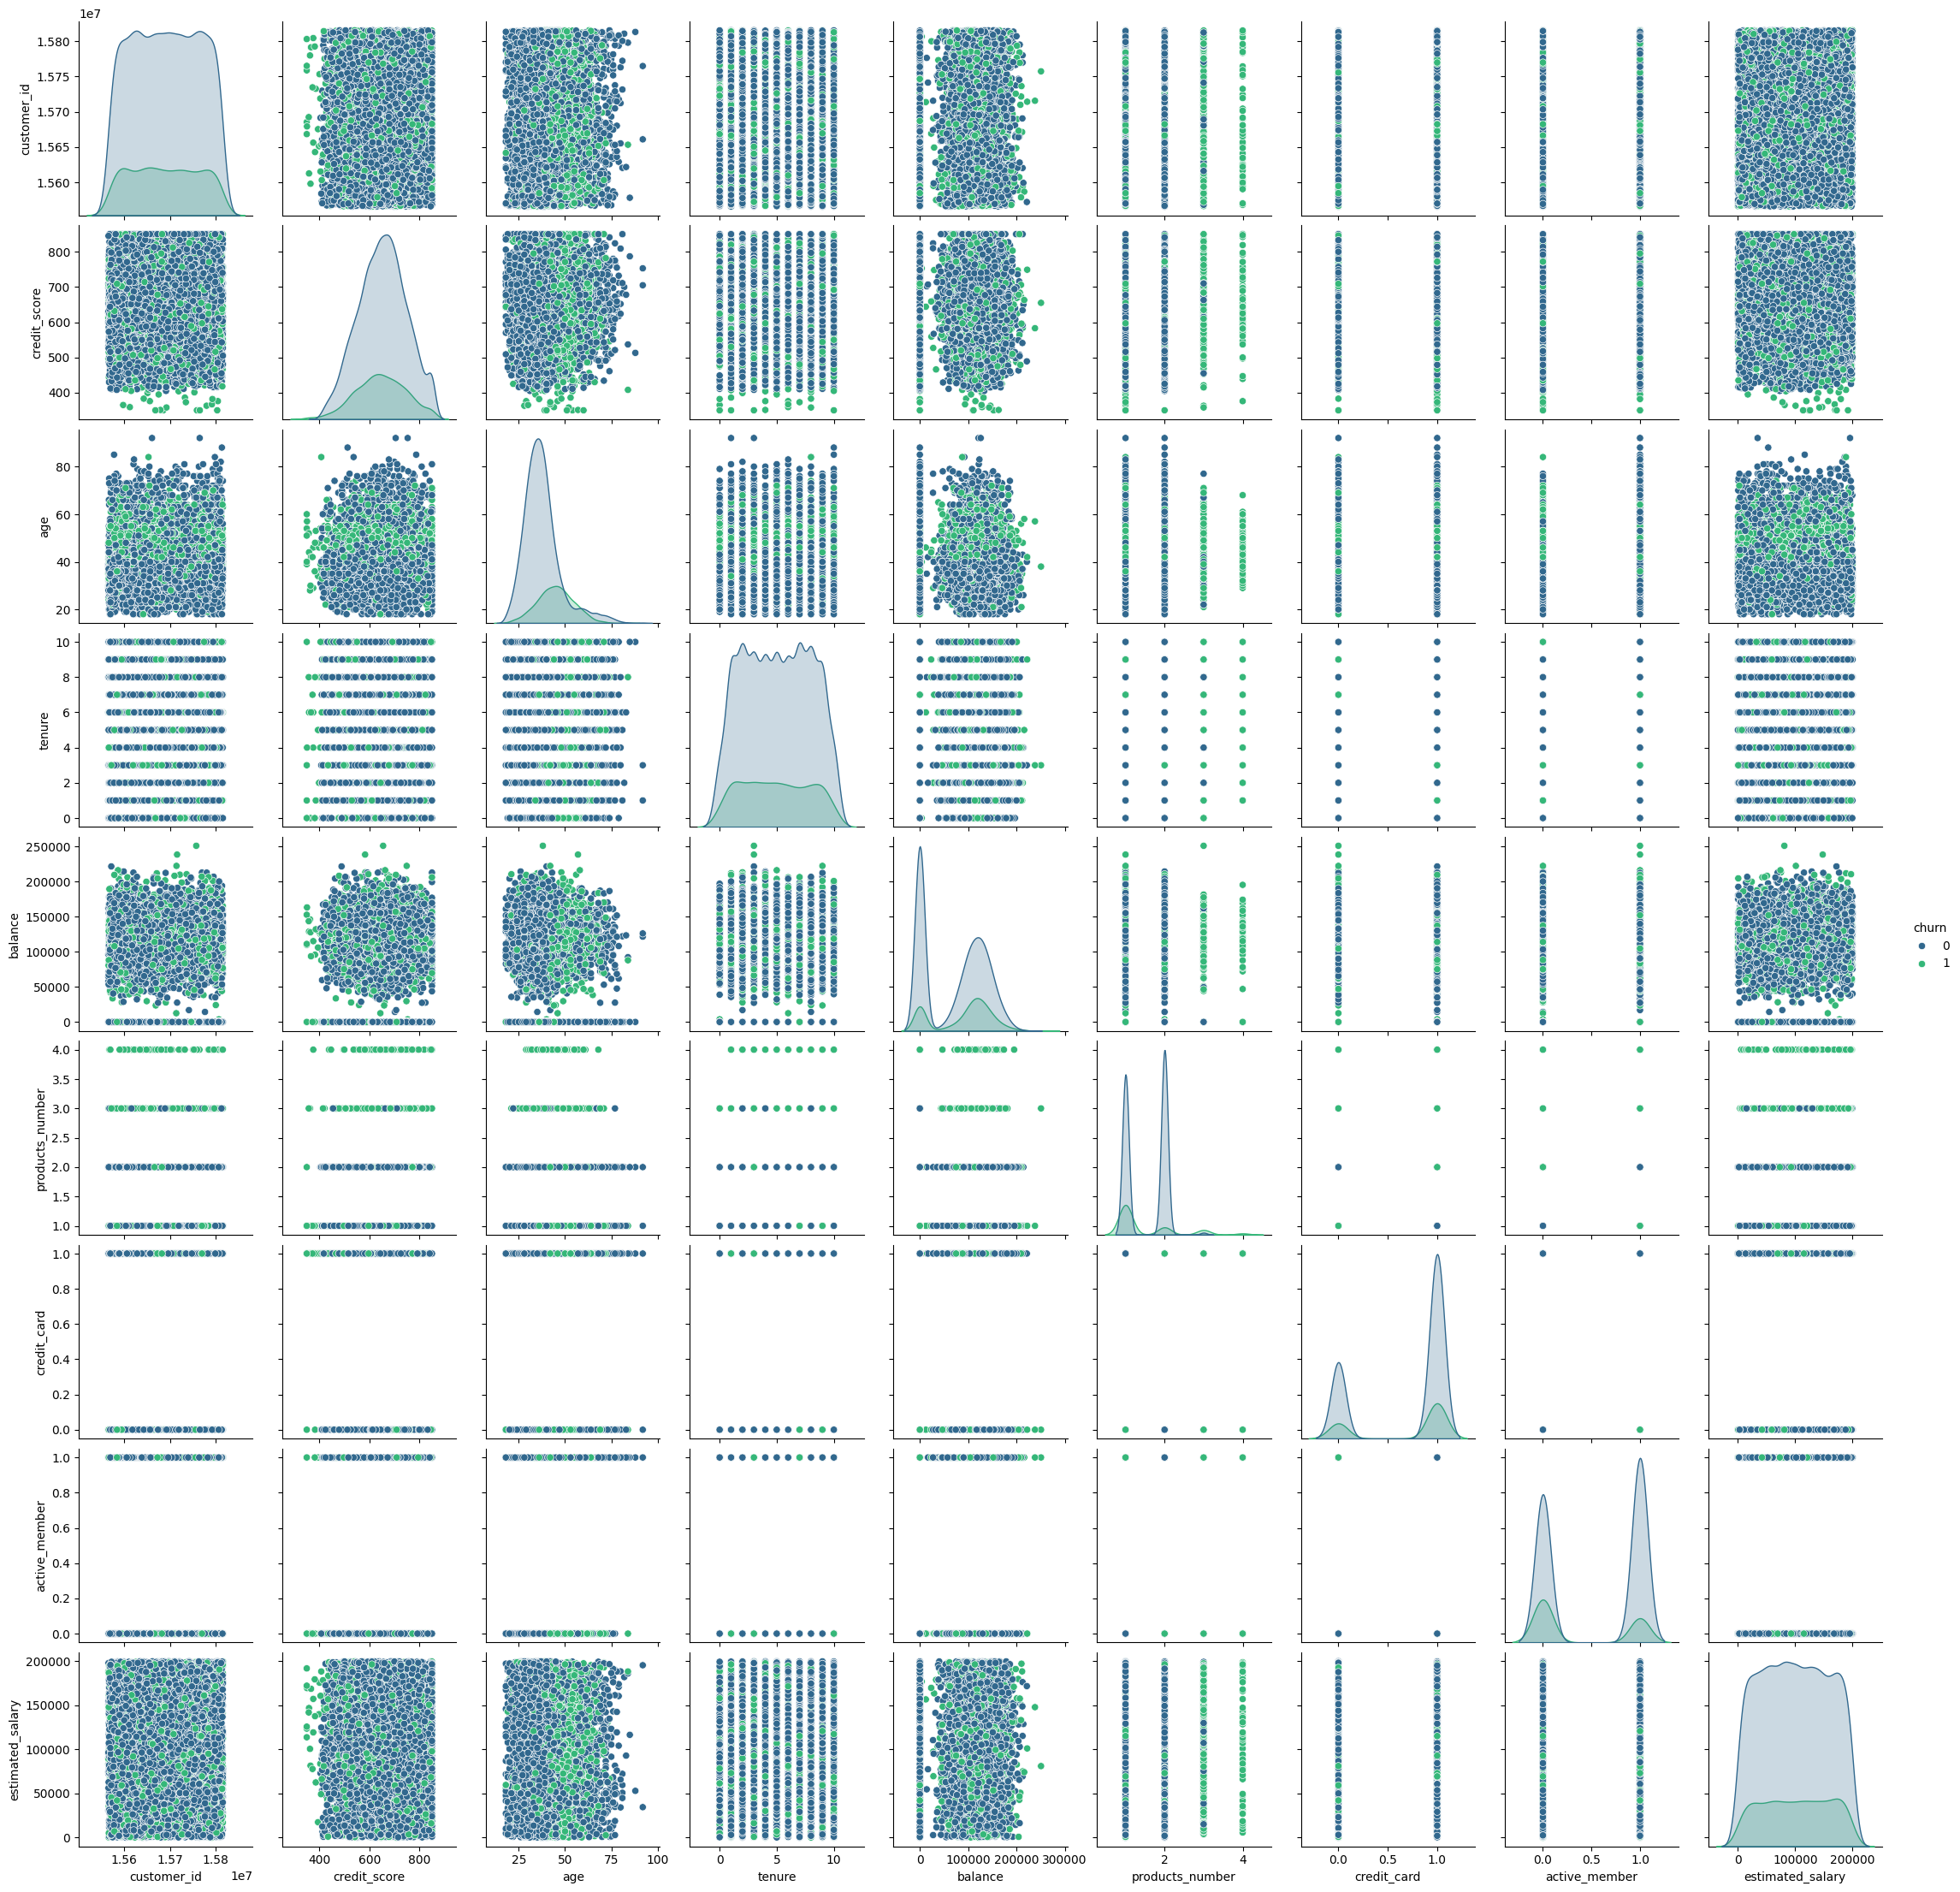

In [ ]:
sns.pairplot(data=df,hue='churn',palette='viridis')
plt.show()

In [ ]:
encodear_label = LabelEncoder()
df['country'] = encodear_label.fit_transform(df['country'])


In [ ]:
df['gender'] = df['gender'].map( lambda x: 1 if x =='Female' else 0)


In [ ]:
X = df.drop(columns = ['churn'])
y = df['churn']

In [ ]:



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
parametros = {"C":[0.001, 0.01, 0.1, 1, 10, 100],
              "solver":[ "liblinear", "newton-cg", "newton-cholesky", "sag", "saga"]}

grid_search = GridSearchCV(LogisticRegression(max_iter=10), parametros, cv=5, scoring="accuracy", n_jobs=-1)
grid_search.fit(X_train, y_train)  # Entrenar búsqueda de hiperparámetros


mejor_resultado = grid_search.best_estimator_

mejor_resultado=mejor_resultado
print(mejor_resultado)



LogisticRegression(C=0.001, max_iter=10, solver='liblinear')
<class 'sklearn.linear_model._logistic.LogisticRegression'>
LogisticRegression(C=0.001, max_iter=10, solver='liblinear')


In [ ]:

y_pred_best = mejor_resultado.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred_best) * 100:.2f}%")



AttributeError: 'str' object has no attribute 'predict'

Accuracy: 80.35%


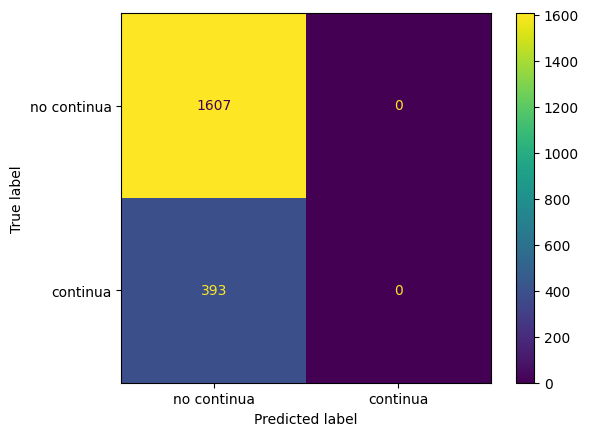

['regresion_logistica.pkl']

In [ ]:
regresion_logistica= LogisticRegression(C=0.001, max_iter=10, solver='liblinear')
regresion_logistica.fit(X_train,y_train)
y_pred = regresion_logistica.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test,y_pred) * 100:.2f}%")
matrix = ConfusionMatrixDisplay.from_estimator(regresion_logistica, X_test, y_test, display_labels=["no continua","continua"])
plt.show()
#joblib.dump(regresion_logistica,"regresion_logistica.pkl")


In [ ]:
def preprocesamiento_regresion_multiple(dataset):
    df=dataset
    encodear_label = LabelEncoder()
    df['country'] = encodear_label.fit_transform(df['country'])
    df['gender'] = df['gender'].map( lambda x: 1 if x =='Female' else 0)
    return df
def split_data_regresion_logistica(df):
      X = df.drop(columns = ['churn'])
      y = df['churn']
      X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
      return X_train, X_test, y_train, y_test
      
def busqueda_en_rejilla(datos_entrenamiento_x,datos_entrenamiento_y,max_iter,parametros):
        grid_search = GridSearchCV(LogisticRegression(max_iter=max_iter), parametros, cv=5, scoring="accuracy", n_jobs=-1)
        grid_search.fit(X_train, y_train)  


        mejor_resultado = grid_search.best_estimator_
        mejores_parametros = grid_search.best_params_
        print(mejor_resultado)

        print(mejores_parametros)
        
        return mejores_parametros,max_iter

def entrenar_regresion_logistica(x_train,y_train,parametros,max_iter):
      regresion_logistica= LogisticRegression(C=parametros.get("C"),max_iter=max_iter ,solver=parametros.get("solver"))
      print("klk")
      regresion_logistica.fit(x_train,y_train)
      joblib.dump(regresion_logistica,"regresion_logistica.pkl")

parametros = {"C":[0.001, 0.01, 0.1, 1, 10, 100],
              "solver":[ "liblinear", "newton-cg", "newton-cholesky", "sag", "saga"]}   
lista,max_iter = busqueda_en_rejilla(X_train,y_train,15,parametros)

entrenar_regresion_logistica(X_train, y_train ,lista,max_iter)
def pipeline_regresion_logistica():
      ...



LogisticRegression(C=0.001, max_iter=15, solver='liblinear')
{'C': 0.001, 'solver': 'liblinear'}
klk


In [ ]:
print(type(lista))
print(max_iter)

print(lista)

<class 'dict'>
15
{'C': 0.001, 'solver': 'liblinear'}


In [2]:
import tkinter as tk
from tkinter import messagebox
import joblib
def calcular(experiencia):
    print(type(experiencia))
    if experiencia=="":
        messagebox.showinfo(message="introduce un dato valido", title="salario")
    else:

        experiencia = int(experiencia)
        modelo = joblib.load("salario.pkl")
        calculo=modelo.predict([[experiencia]])
        messagebox.showinfo(message=calculo, title="salario")
        ventana.destroy()

 

    

ventana = tk.Tk()
label = tk.Label(ventana,text="introduce los años de experiencia")
label.pack()
experiencia = tk.Entry(ventana)
experiencia.pack()
boton = tk.Button(ventana,text="calcular",command=lambda: calcular(experiencia.get()))
boton.pack()
ventana.mainloop()

In [ ]:
import tkinter as tk
from tkinter import messagebox
import joblib
def calcular_regresion_multiple(horas_estudiadas,puntuaciones_previas,actividades_extracurriculares,horas_dormidas,practicado_previo):
    lista=[]
    
    if horas_estudiadas=="" or puntuaciones_previas=="" or actividades_extracurriculares==""or horas_dormidas==""or practicado_previo=="" :
        messagebox.showinfo(message="introduce un dato valido", title="error")
    else:
        if actividades_extracurriculares=="Yes":
            actividades_extracurriculares=1
        else:
            actividades_extracurriculares=0
        lista.append(int(horas_estudiadas))
        lista.append(int(puntuaciones_previas))
        lista.append(int(actividades_extracurriculares))
        lista.append(int(horas_dormidas))
        lista.append(int(practicado_previo))

        
        modelo = joblib.load("regresion_lineal_multiple.pkl")
        calculo=modelo.predict([lista])
        messagebox.showinfo(message=calculo, title="salario")
        ventana.destroy()

 

ventana = tk.Tk()
horas = tk.Label(ventana,text="horas estudiadas")
horas.pack()

horas_estudiadas = tk.Entry(ventana)
horas_estudiadas.pack()

puntuaciones = tk.Label(ventana,text="puntuaciones previas")
puntuaciones.pack()
puntuaciones_previas = tk.Entry(ventana)
puntuaciones_previas.pack()
actividades = tk.Label(ventana,text="actividades extracurriculares")
actividades.pack()
actividades_extracurriculares = tk.Entry(ventana)
actividades_extracurriculares.pack()
horas_dor = tk.Label(ventana,text="horas dormidas")
horas_dor.pack()
horas_dormidas = tk.Entry(ventana)
horas_dormidas.pack()
practicado = tk.Label(ventana,text="practicado ")
practicado.pack()
practicado_previo = tk.Entry(ventana)
practicado_previo.pack()



boton = tk.Button(ventana,text="calcular",command=lambda: calcular_regresion_multiple(horas_estudiadas.get(),puntuaciones_previas.get(),actividades_extracurriculares.get(),horas_dormidas.get(),practicado_previo.get()))
boton.pack()
ventana.mainloop()

c:\Users\Manu\Desktop\Proyecto_final\entorno\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
def calcular(experiencia):
    modelo = joblib.load("salario.pkl")
    resultado = modelo.predict([[experiencia]])
    



Resultado del cálculo para 2 años de experiencia: 43227.83
Modelo cargado correctamente


c:\Users\Manu\Desktop\Proyecto_final\entorno\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [5]:
data = pd.read_csv("Churn_Modelling.csv")
df= data.copy()
print(df.columns)
df = df.drop(columns='RowNumber')
df.describe()
print(df.info())
print("valores_nulos",df.isna().sum(),"\n")

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           1

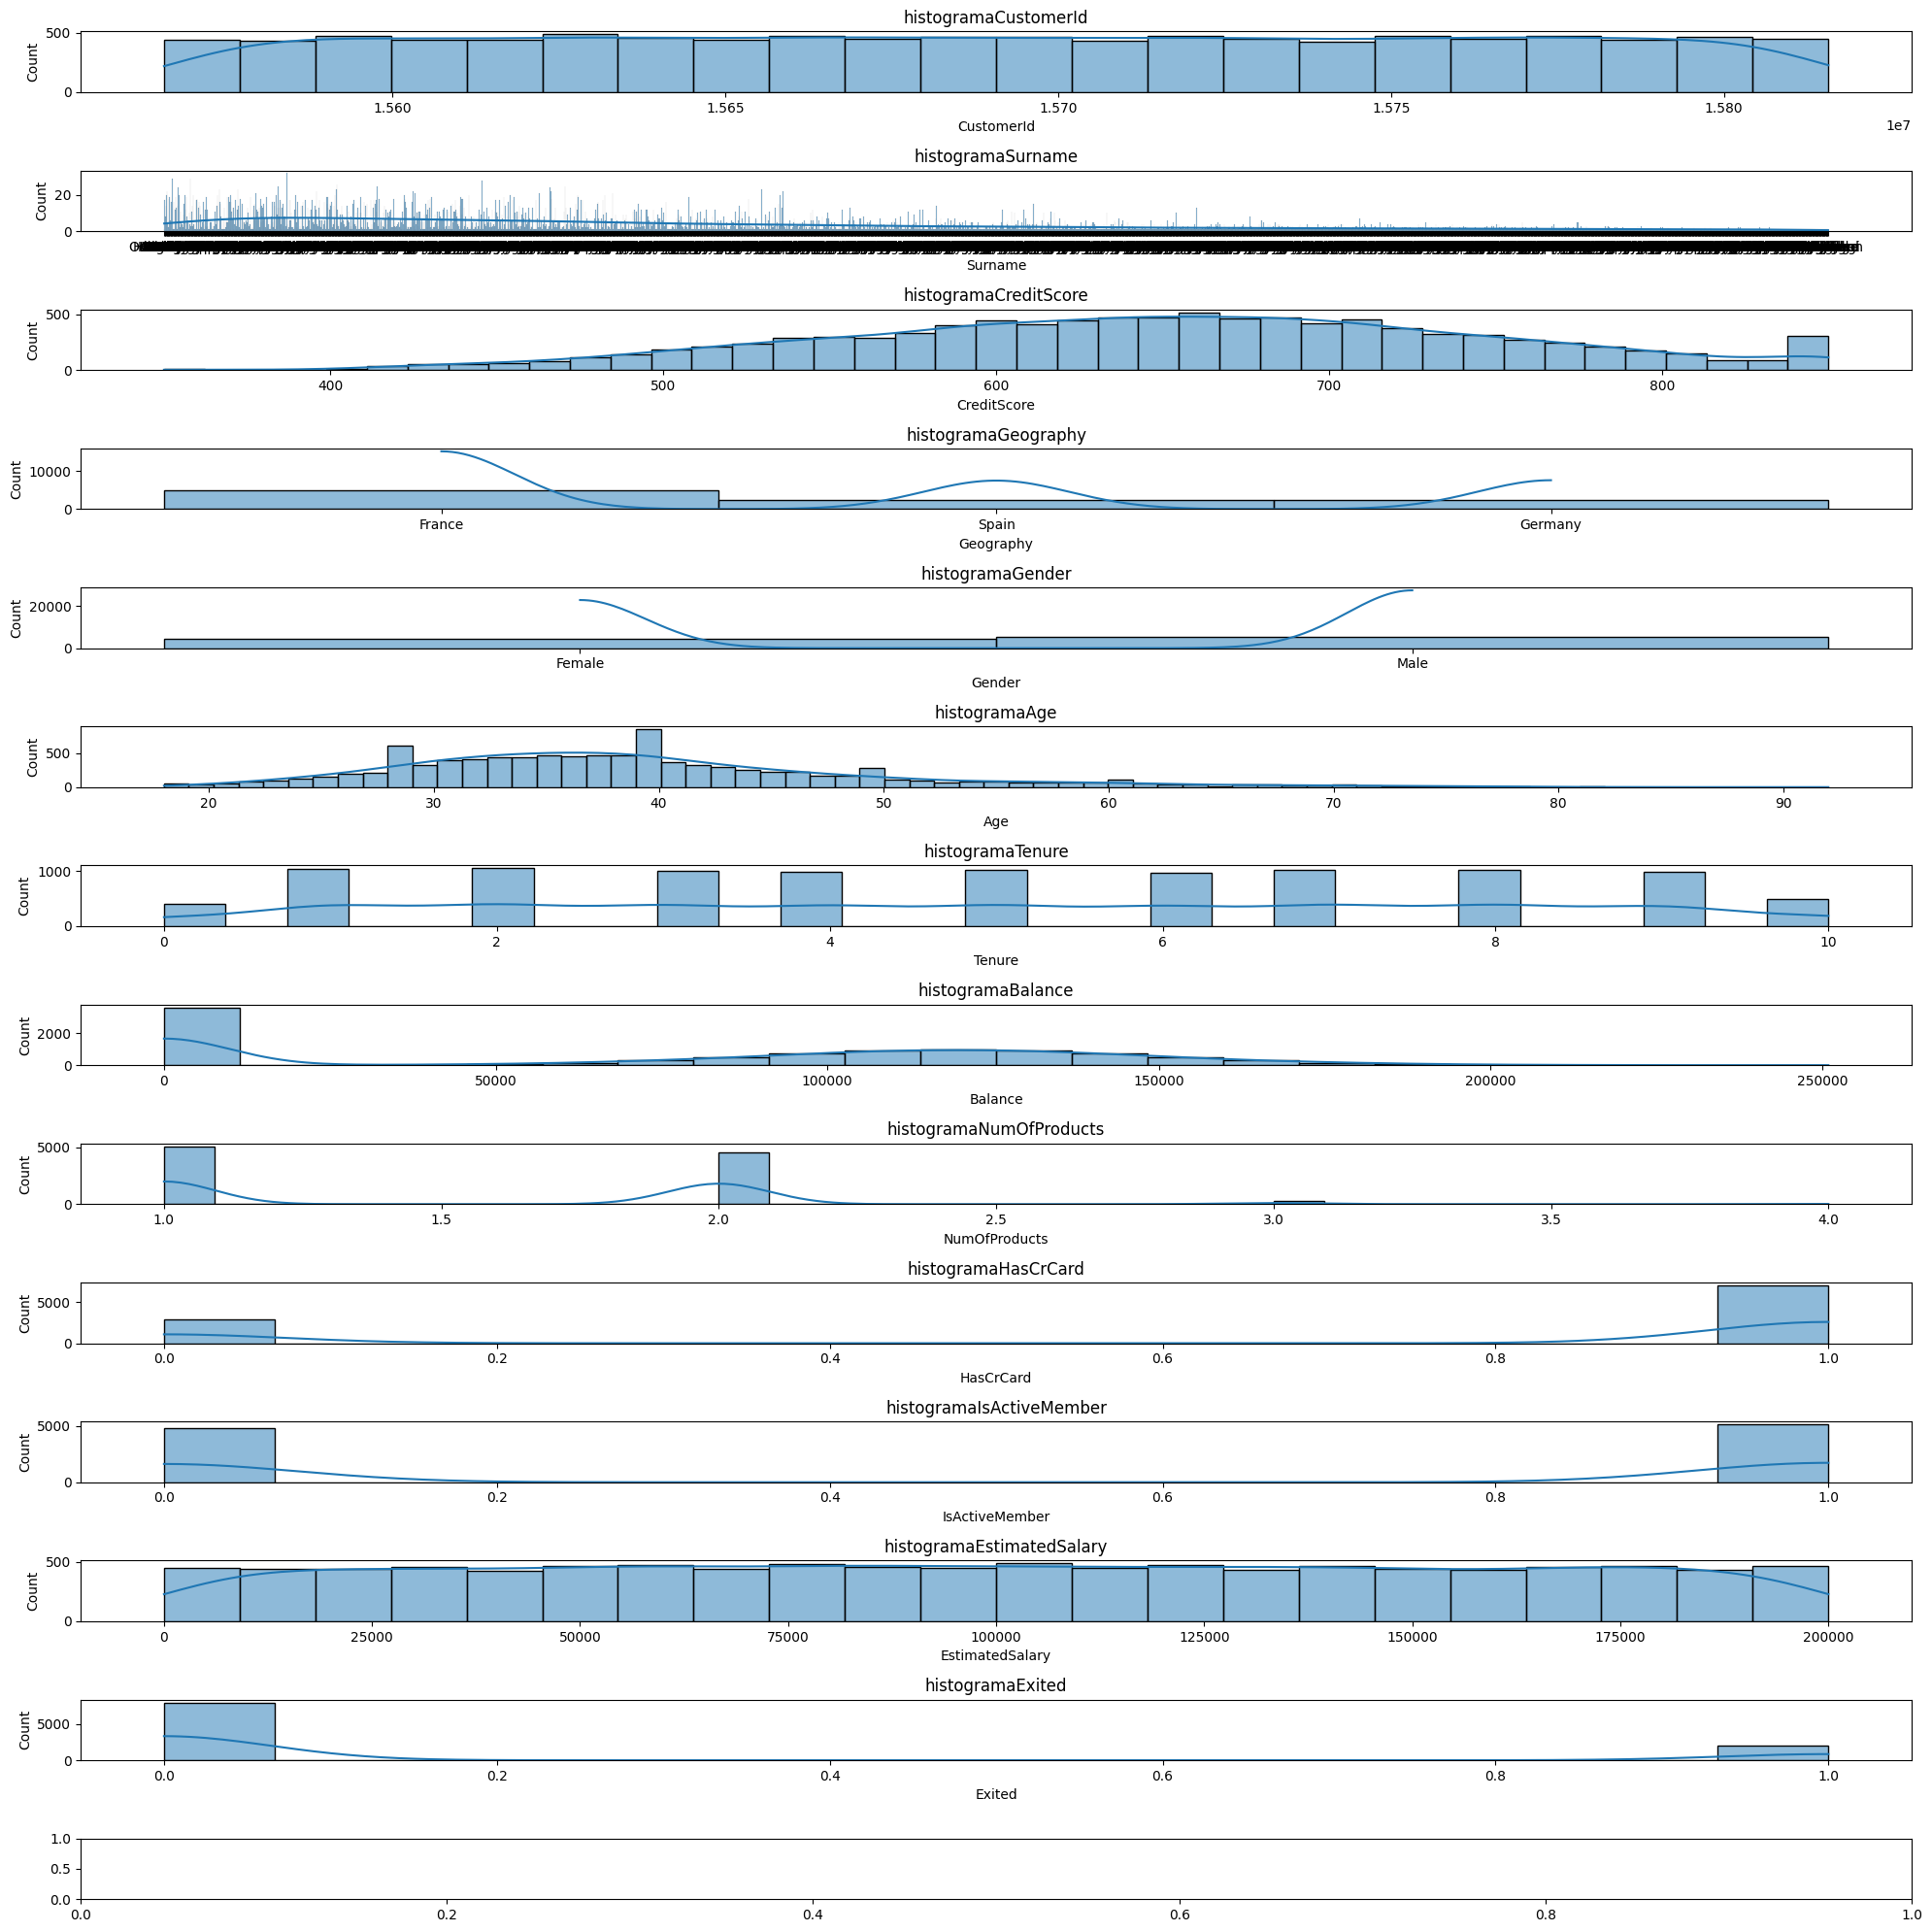

In [ ]:

fig,axex = plt.subplots(nrows=14,ncols=1,figsize=(20,20))
for col,ax in zip(df,axex):
    ax.set_title(f"histograma{col}")
    sns.histplot(data=df[col],ax=ax,kde=True)
    
    
    plt.tight_layout()
plt.show()

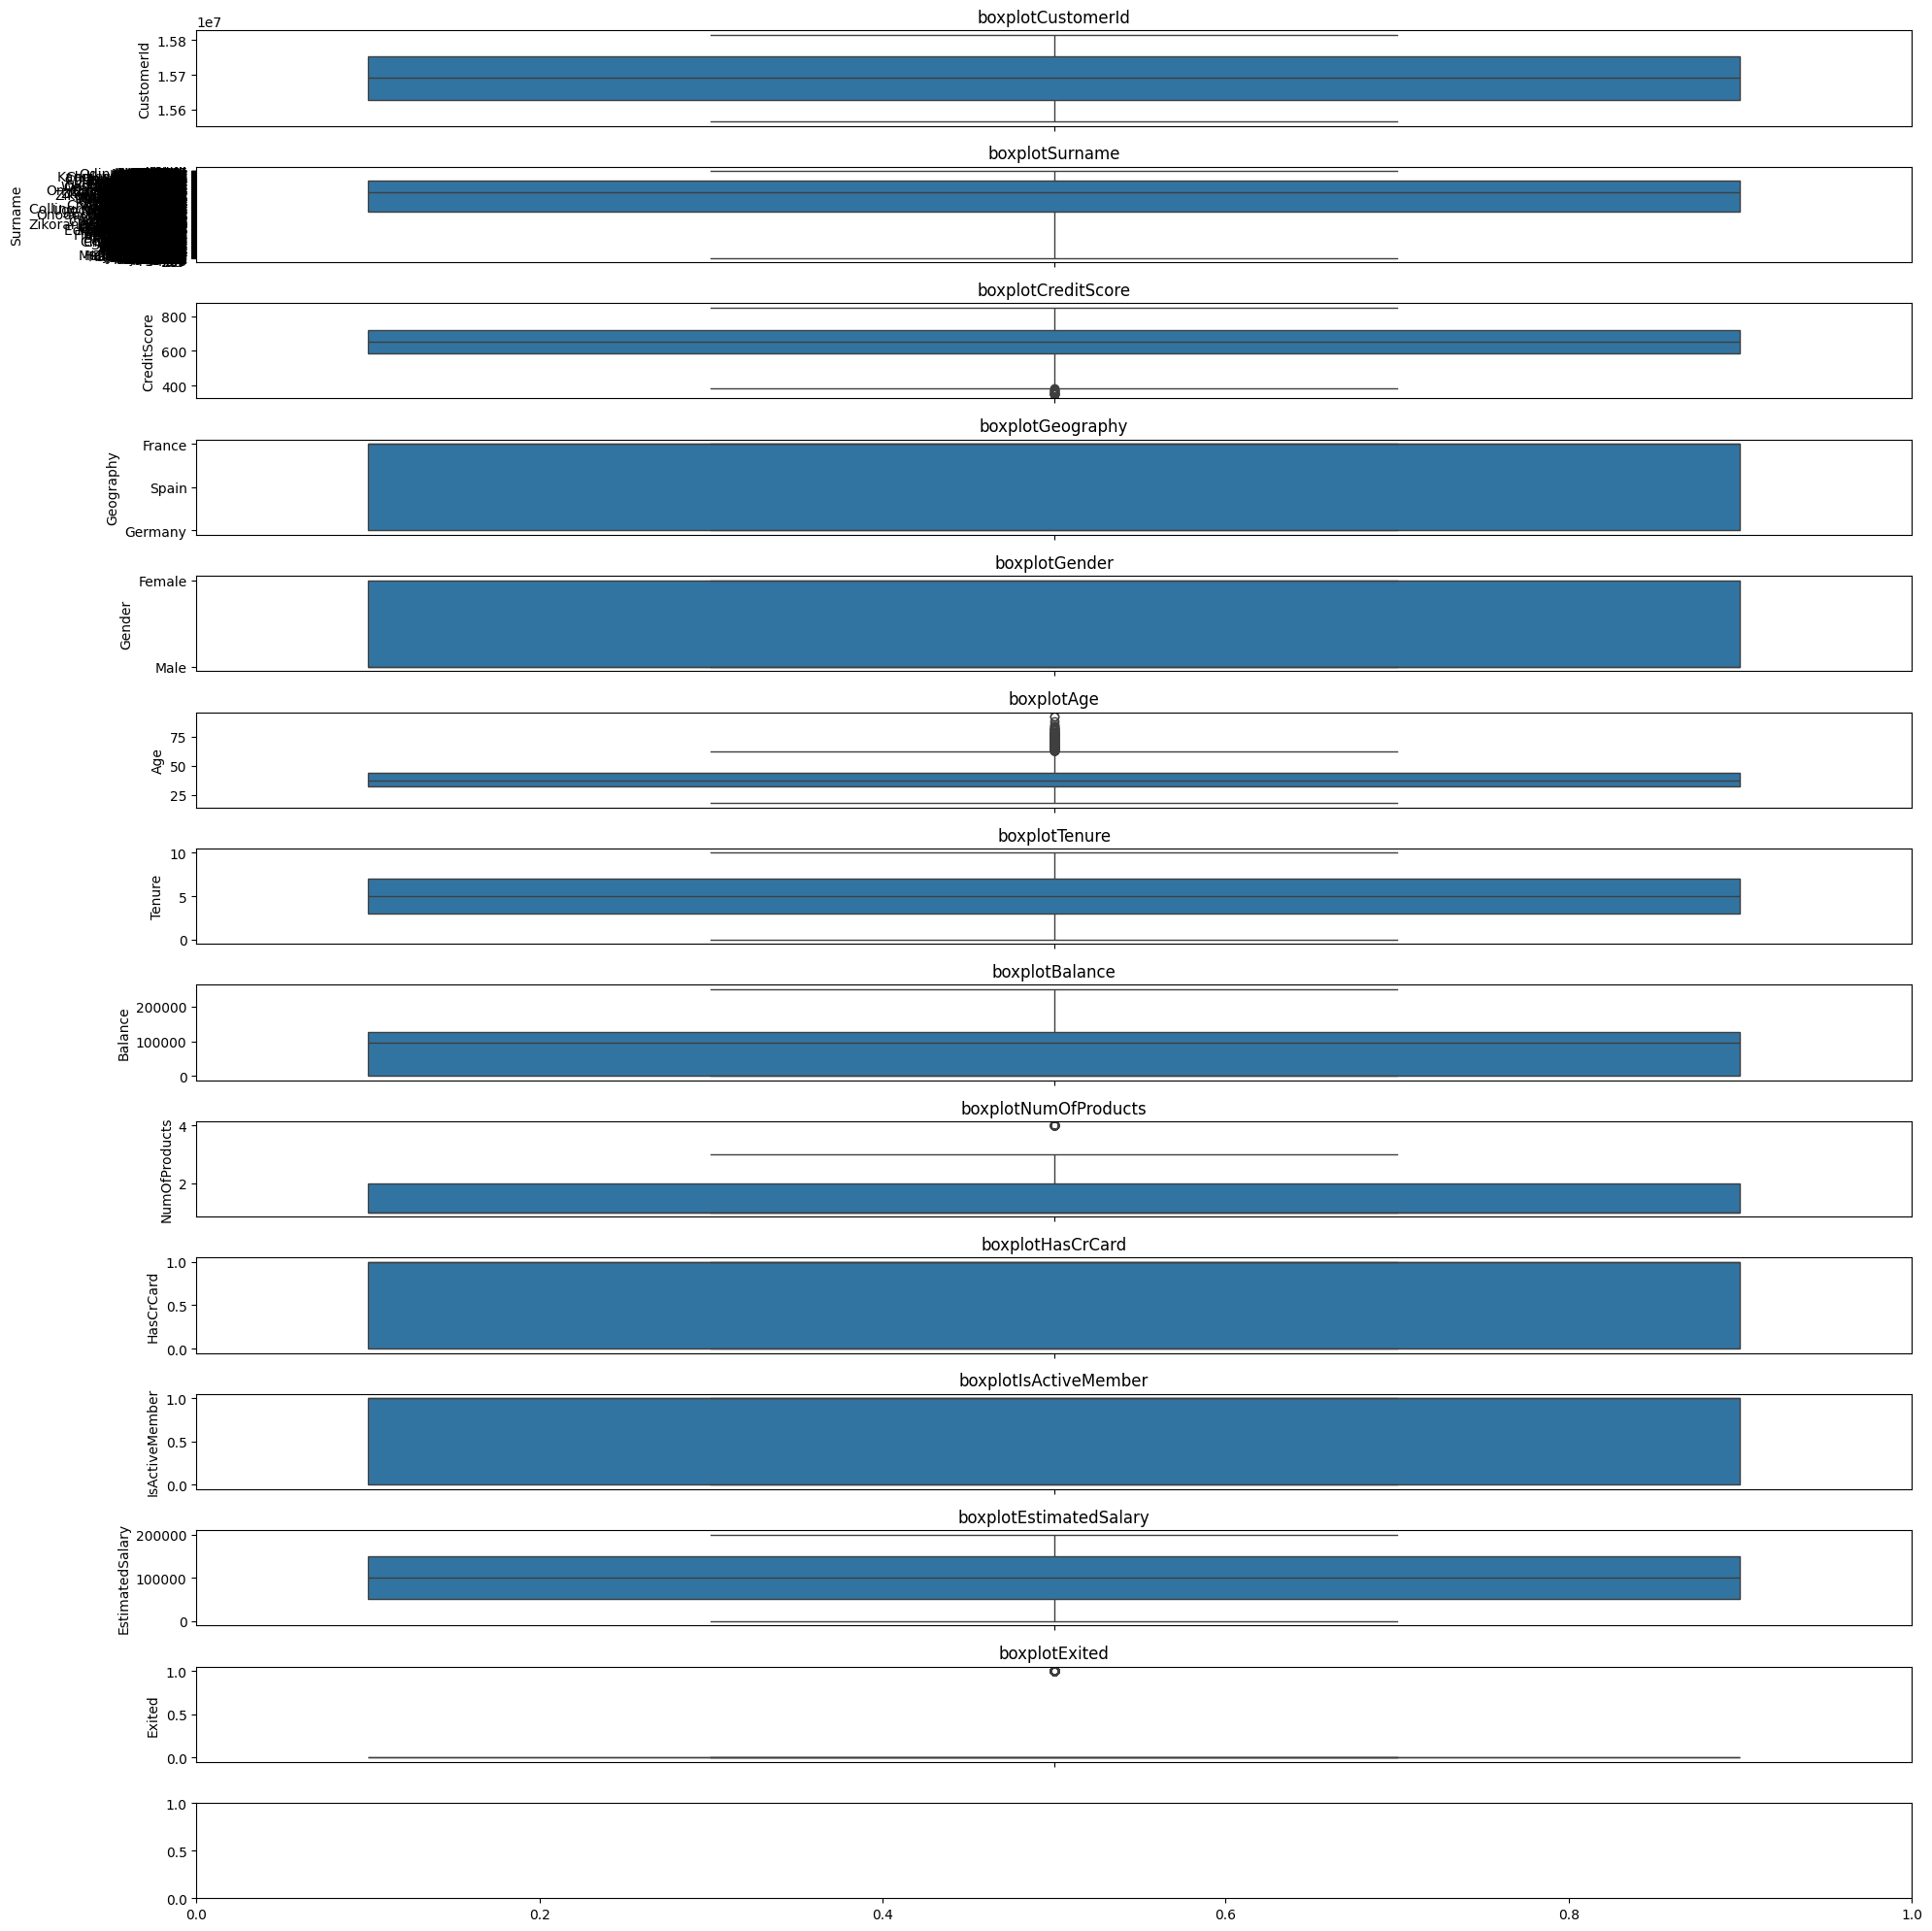

In [ ]:
fig,axex = plt.subplots(nrows=14,ncols=1,figsize=(20,20))
for col,ax in zip(df,axex):
    ax.set_title(f"boxplot{col}")
    sns.boxplot(data=df[col],ax=ax)
    
    
    plt.tight_layout()
plt.show()

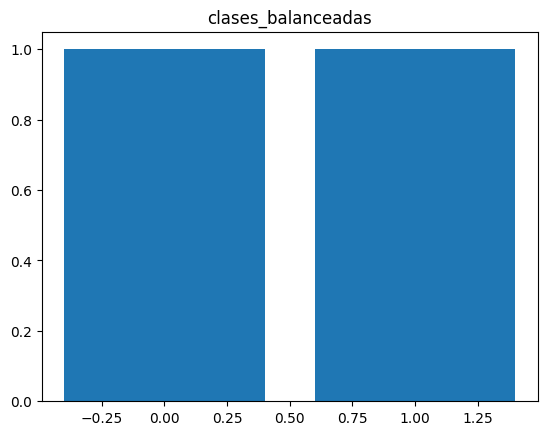

In [52]:
plt.bar(df['Exited'],height=1)

plt.title("clases_balanceadas")
plt.show()

In [8]:
encodear_label = LabelEncoder()

df['Surname'] = encodear_label.fit_transform(df['Surname'])
df['Geography'] = encodear_label.fit_transform(df['Geography'])
df['Gender'] = df['Gender'].map( lambda x: 1 if x =='Female' else 0)

In [17]:
X = df.drop(columns=["Exited","Surname"])
y = df["Exited"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [18]:
escaler = StandardScaler()
X_train = escaler.fit_transform(X_train)
X_test = escaler.fit_transform(X_test)
print(X_train.shape)
y_train.shape



(8000, 11)


(8000,)

In [47]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping

import tensorflow as tf
SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)
modelo = Sequential()
modelo.add(Dense(units=8,kernel_initializer="uniform",activation="relu",input_shape=(11,)))

modelo.add(Dense(units=32,kernel_initializer="uniform",activation="relu"))
modelo.add(Dense(units=32,kernel_initializer="uniform",activation="relu"))



modelo.add(Dense(units=1,kernel_initializer="uniform",activation="sigmoid"))
modelo.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)
modelo.summary()
history = modelo.fit(X_train,y_train,batch_size=10,epochs=10,validation_split=0.1)
print(history.history)





c:\Users\ia\Desktop\Trabajo final\entorno\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_55 (Dense)                │ (None, 8)              │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_56 (Dense)                │ (None, 32)             │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_57 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_58 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,473 (5.75 KB)

 Trainable params: 1,473 (5.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
720/720 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7900 - loss: 0.5266 - val_accuracy: 0.8037 - val_loss: 0.4185
Epoch 2/10
720/720 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7899 - loss: 0.4379 - val_accuracy: 0.8037 - val_loss: 0.4101
Epoch 3/10
720/720 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8100 - loss: 0.4299 - val_accuracy: 0.8350 - val_loss: 0.4081
Epoch 4/10
720/720 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8235 - loss: 0.4260 - val_accuracy: 0.8375 - val_loss: 0.4065
Epoch 5/10
720/720 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8261 - loss: 0.4233 - val_accuracy: 0.8363 - val_loss: 0.4048
Epoch 6/10
720/720 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8268 - loss: 0.4213 - val_accuracy: 0.8375 - val_loss: 0.4033
Epoch 7/10
720/720 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8282 - loss: 0.4199 - val_accuracy: 0.8425 - val_loss: 0.4024
Epoch 8/10
720/720 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8283 - loss: 0.4184 - val_accuracy: 0.

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


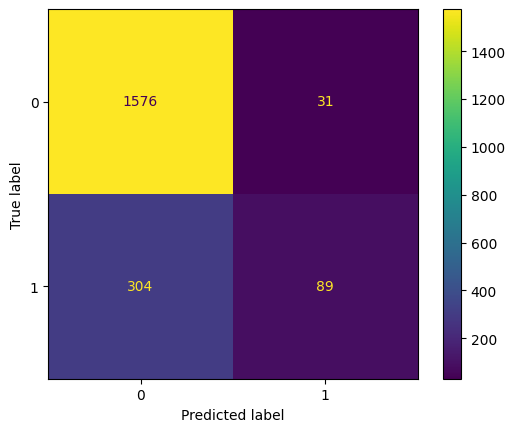

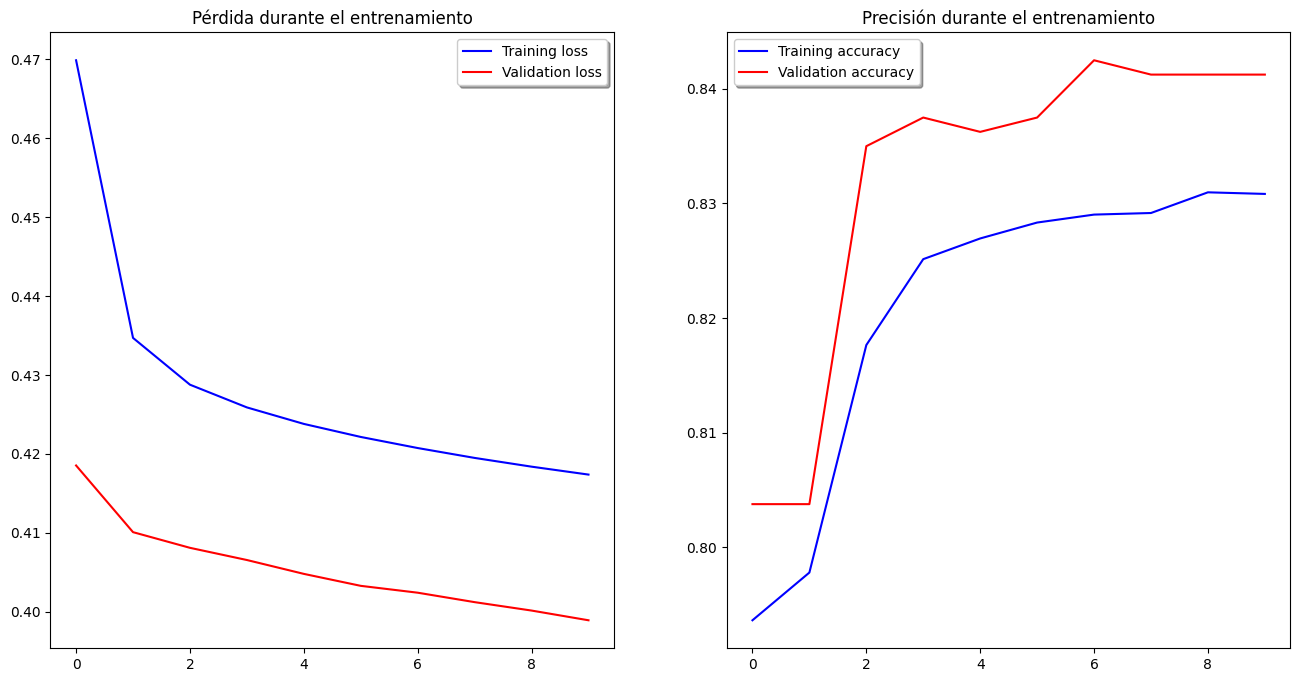

In [48]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


y_pred_continuous = modelo.predict(X_test)
y_pred_classes = (y_pred_continuous > 0.5).astype(int)  

cm = confusion_matrix(y_test, y_pred_classes)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

fig, ax = plt.subplots(1, 2, figsize=(16, 8))

# Pérdida
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="Validation loss")
ax[0].legend(loc='best', shadow=True)
ax[0].set_title('Pérdida durante el entrenamiento')

# Precisión
ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r', label="Validation accuracy")
ax[1].legend(loc='best', shadow=True)
ax[1].set_title('Precisión durante el entrenamiento')

plt.show()





